In [1]:
%pip install --user responsibly

  Stored in directory: C:\Users\simona\AppData\Local\pip\Cache\wheels\73\6b\89\bb14fd56b74774a39a771a12f525a6a14c2c2692d3084ad048
Successfully built gensim
Note: you may need to restart the kernel to use updated packages.


  The script tabulate.exe is installed in 'C:\Users\simona\AppData\Roaming\Python\Python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import responsibly
responsibly.__version__



'0.1.3'

In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()


In [7]:
# dataset vocabulary size

len(w2v_small.vocab)

26423

In [8]:
# get the vector of the word "love"

print('love =', w2v_small['love'])

love = [ 0.0386357  -0.0571296   0.00970471  0.0618904  -0.0618904   0.0250858
  0.109865   -0.0988782  -0.0527351   0.0754404  -0.00984205 -0.0307621
 -0.0103914  -0.0164797  -0.088258    0.0637215   0.0483405   0.0589607
  0.00283817 -0.0261844  -0.0144655   0.0298466   0.0860607  -0.0538337
  0.0629891  -0.0131838   0.0206912   0.0401006   0.0419317  -0.061158
 -0.0419317   0.0523688   0.00583656  0.0479742   0.0578621   0.028931
  0.0981458   0.0324101  -0.00943005  0.125246    0.0699472  -0.0787364
  0.0265506   0.00975049 -0.0399175  -0.0384526   0.0461432   0.0176699
  0.00828563  0.0218814  -0.0411993   0.056031   -0.0401006   0.00583656
  0.0336918   0.0421148  -0.0163881  -0.0426641  -0.00140192 -0.00682077
  0.0911877   0.0316777  -0.0265506   0.0677499   0.0131838  -0.0362553
 -0.0823985  -0.00123026 -0.0119936   0.0692148   0.106935   -0.032227
 -0.0419317   0.00801097 -0.114992   -0.0346074  -0.0710458   0.00567634
  0.069581    0.128908   -0.116457    0.0845958   0.03277

In [9]:
#measuring the similarity

In [10]:
w2v_small['cat'] @ w2v_small['cat']


1.0000006

In [11]:
w2v_small['cat'] @ w2v_small['cats']

0.8099383

In [12]:
w2v_small['cat'] @ w2v_small['dog']

0.7609462

In [13]:
w2v_small['cat'] @ w2v_small['horse']


0.38147917

In [14]:
w2v_small['cat'] @ w2v_small['finance']

-0.037760373

In [15]:
w2v_small['horse'] @ w2v_small['finance']

8.083909e-05

In [16]:
w2v_small['cat'] @ w2v_small['snake']

0.52594966

In [17]:
w2v_small.most_similar('cat', topn=5)

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326232194900513),
 ('puppy', 0.707545280456543)]

In [18]:
w2v_small.most_similar('horse', topn=3)

[('horses', 0.8654032945632935),
 ('stallion', 0.7200170159339905),
 ('thoroughbred', 0.7158915996551514)]

In [19]:
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper personal_trainer'.split())

'nurse'

In [20]:
w2v_small.doesnt_match('hairdresser nurse 123 woman housekeeper manager'.split())


'manager'

In [21]:
w2v_small.doesnt_match('hairdresser nurse 0 man woman housekeeper manager'.split())


'manager'

In [23]:
w2v_small.doesnt_match('hairdresser nurse cat woman housekeeper'.split())


'cat'

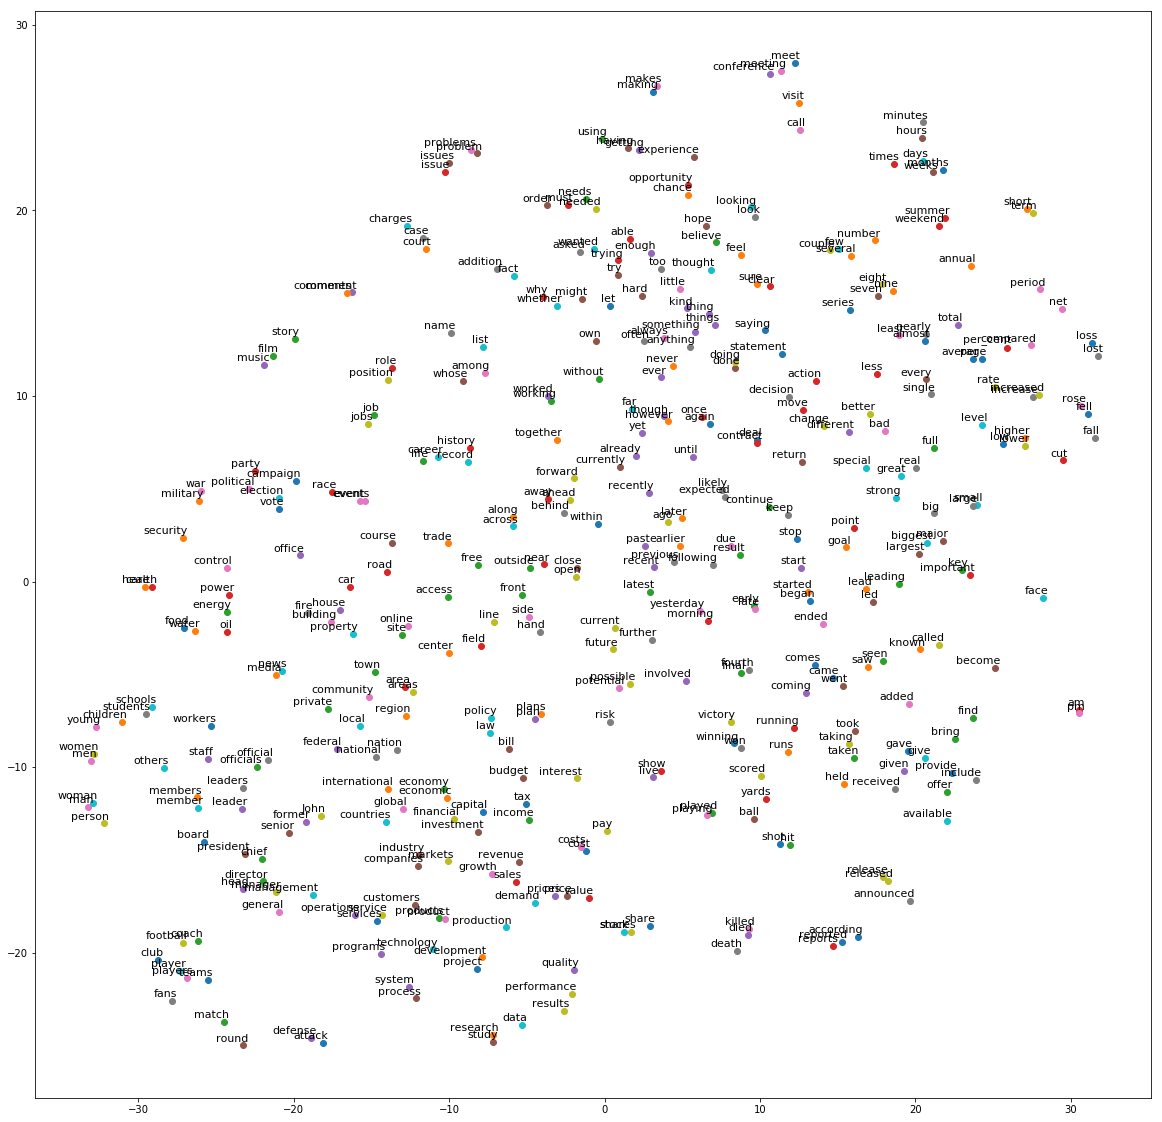

In [24]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()


In [25]:
# small is to smaller as good is to what?
w2v_small.most_similar(positive=['good', 'smaller'], negative=['small'], topn=2)


[('better', 0.7270160913467407), ('stronger', 0.5597214102745056)]

In [27]:
# man is to carpenter as woman is to what?

w2v_small.most_similar(positive=['carpenter', 'woman'], negative=['men'], topn=2)


[('schoolteacher', 0.590914785861969), ('homemaker', 0.5572819709777832)]

In [28]:
# man is to carpenter as woman is to what?

w2v_small.most_similar(positive=['queen', 'woman'], negative=['men'], topn=2)


[('princess', 0.627016544342041), ('lady', 0.5371580719947815)]

In [33]:


w2v_small.most_similar(positive=['walk', 'swimming'], negative=['swim'], topn=2)


[('walking', 0.785089910030365), ('walks', 0.6884379982948303)]

In [34]:
# man is to carpenter as woman is to what?

w2v_small.most_similar(positive=['economy', 'national'], negative=['nation'], topn=2)


[('economic', 0.5237725973129272), ('tourism', 0.4301985502243042)]

In [36]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)


In [37]:
# high-level function to calculate gender bias built into responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905466893873

In [40]:
# list of gender neutral professions
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']


In [41]:
# what responsibly does within the calc_direct_bias function:

neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)


0.07307905457595648

In [42]:
len(w2v_small_gender_bias._data['neutral_words'])


26189

In [43]:
import random
print(random.sample(w2v_small_gender_bias._data['neutral_words'],10))


['centuries', 'thorny', 'law_abiding', 'intangibles', 'reprisal', 'celebrity_chef', 'flaring', 'affordability', 'catalogs', 'packed']


In [44]:
# we obtain a version of the embeddings that is mitigated wrt the gender direction
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)


In [45]:
# measure of bias in the original embeddings
w2v_small_gender_bias.calc_direct_bias()

0.07307905464937865

In [46]:
# measure of bias in the mitigated embeddings
w2v_small_gender_debias.calc_direct_bias()

1.1615064689682008e-09

In [47]:
'home' in (w2v_small_gender_bias._data['neutral_words'])

True

In [48]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)


home: before = 0.011340496779172309 after =  -1.1762454052148433e-09


In [49]:
print('architect:',
      'before =', w2v_small_gender_bias.model['architect'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['architect'] @ w2v_small_gender_debias.direction)



architect: before = -0.17738309189742657 after =  -4.1545970892622845e-10


In [50]:
print('interior_designer:',
      'before =', w2v_small_gender_bias.model['interior_designer'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['interior_designer'] @ w2v_small_gender_debias.direction)

interior_designer: before = 0.19845774284382506 after =  2.8877262206895155e-09


In [51]:
'man' in (w2v_small_gender_bias._data['neutral_words'])

False

In [52]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)

man: before = -0.2209519293604172 after =  -0.2209519293604172


In [53]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)


woman: before = 0.3403474745246815 after =  0.3403474745246814


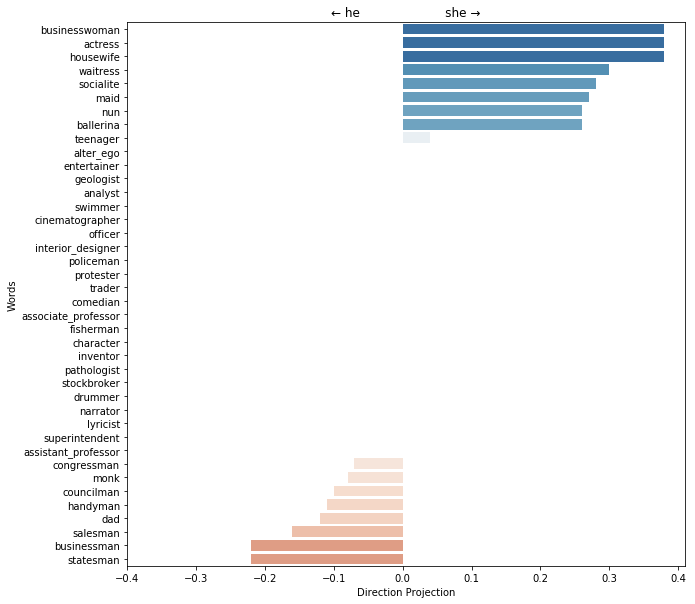

In [54]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);
